## MNIST 手書き数字認識
手書き数字データセット MNIST を用いた分類モデルの学習・評価レポートです。

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 再現性のためシード固定
np.random.seed(42)
tf.random.set_seed(42)

### 1. データの読み込み・正規化・形状確認

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 正規化 (0-255 -> 0-1) と CNN 用にチャンネル次元を追加
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)   # (10000, 28, 28, 1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("Label range: ", y_train.min(), "~", y_train.max())

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)
Label range:  0 ~ 9


### 2. サンプル画像の表示

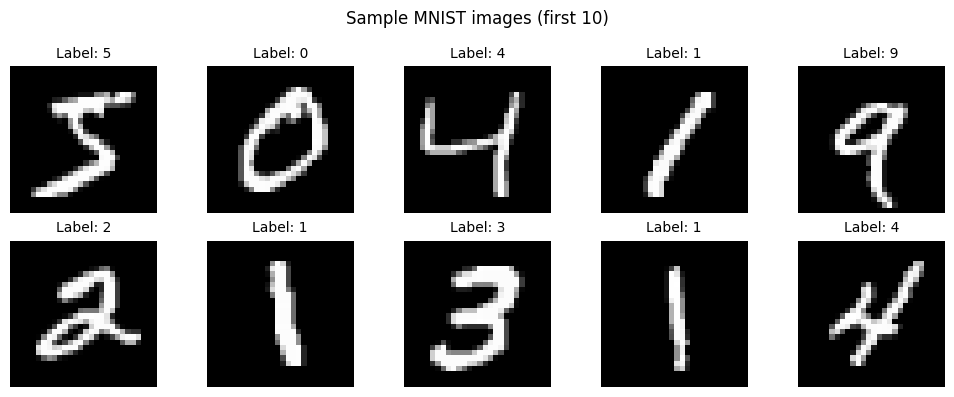

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].squeeze(), cmap="gray")
    ax.set_title(f"Label: {y_train[i]}", fontsize=10)
    ax.axis("off")
plt.suptitle("Sample MNIST images (first 10)", fontsize=12)
plt.tight_layout()
plt.show()

### 3. モデル定義・コンパイル・学習

In [12]:
model = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1,
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9207 - loss: 0.2618 - val_accuracy: 0.9828 - val_loss: 0.0607
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9770 - loss: 0.0758 - val_accuracy: 0.9878 - val_loss: 0.0435
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9830 - loss: 0.0551 - val_accuracy: 0.9898 - val_loss: 0.0365
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9859 - loss: 0.0443 - val_accuracy: 0.9905 - val_loss: 0.0342
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9892 - loss: 0.0343 - val_accuracy: 0.9910 - val_loss: 0.0356


### 4. テスト評価

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9914 - loss: 0.0283
Test accuracy: 0.9914
Test loss: 0.0283


### 5. 混同行列（Confusion Matrix）

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


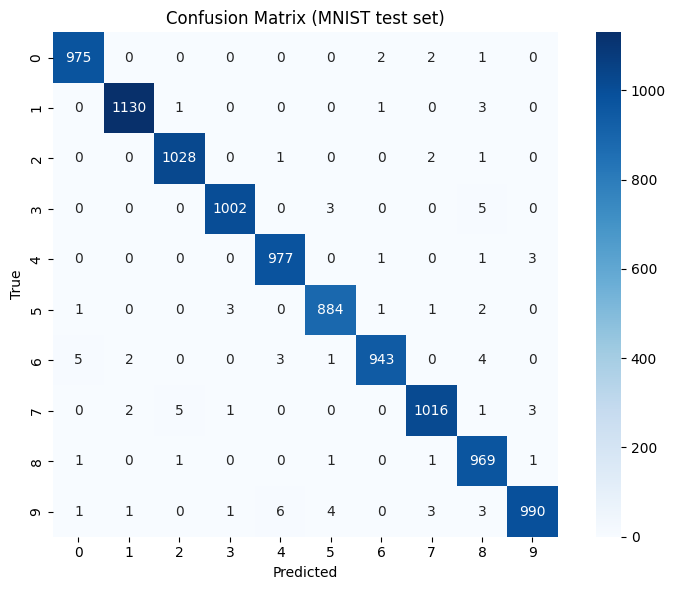

In [15]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, square=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix (MNIST test set)")
plt.tight_layout()
plt.show()

### 6. 誤分類サンプルの可視化

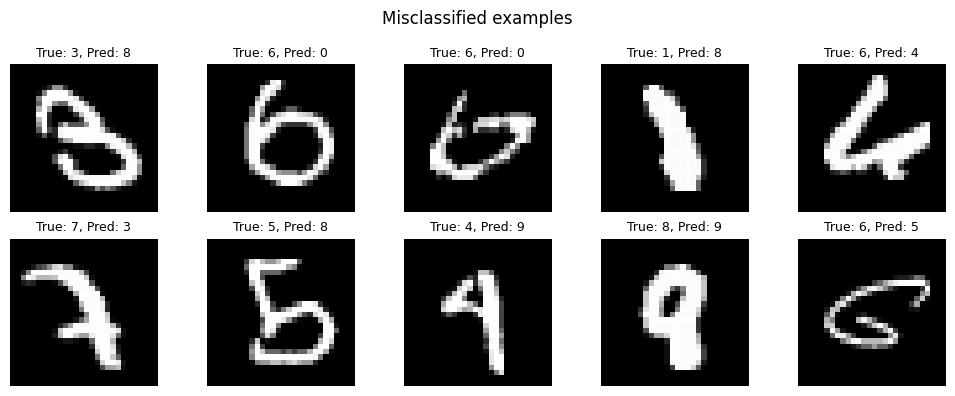

In [16]:
misclassified = np.where(y_pred != y_test)[0]
n_show = min(10, len(misclassified))
indices = misclassified[:n_show]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    if i < n_show:
        idx = indices[i]
        ax.imshow(x_test[idx].squeeze(), cmap="gray")
        ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=9)
    ax.axis("off")
plt.suptitle("Misclassified examples", fontsize=12)
plt.tight_layout()
plt.show()